In [1]:
from transformer_lens import utils, HookedTransformer, ActivationCache, patching, evals
from transformer_lens.hook_points import HookPoint
from transformer_lens.utils import get_act_name
from tqdm import tqdm
import torch
from torch import Tensor
import numpy as np
from jaxtyping import Int, Float
from typing import List, Optional, Tuple
import seaborn as sns
import matplotlib.pyplot as plta

import pandas as pd
from tqdm import tqdm
from einops import repeat

from DSA.dmd import DMD
from DSA.simdist import SimilarityTransformDist
from sklearn.manifold import MDS

/home/jsalle/.conda/envs/p11/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
def get_model(model_name: str = 'gpt2-small', 
              checkpoint_index: int = None,
              device=None) -> HookedTransformer:
    """
    Loads source or target model.
    Pythia models have 154 checkpoints.

    model_name: ['gpt2-small', 'pythia-6.9b'] see transformer_lens list
    """
    return HookedTransformer.from_pretrained(model_name, 
                                             checkpoint_index=checkpoint_index,
                                             device=device)


def store_activations_in_array(model: HookedTransformer,
                               prompt: str,
                               activation_type: str = 'resid_pre'):

    _, cache = model.run_with_cache(prompt)
    
    x = torch.zeros([1, model.cfg.n_layers, model.cfg.d_model])

    for l in range(0, model.cfg.n_layers):
        activations_last_token = cache[activation_type, l][0, -1, :]
        x[0, l, :] = activations_last_token

    return x



checkpoint_indexes = np.arange(0, 153, 7, dtype=int)
activations = []
model_types = []
models = []

for i, check in enumerate(checkpoint_indexes):
    print(f'Checkpoint {i}/{len(checkpoint_indexes)-1}')
    model = get_model("pythia-2.8b", checkpoint_index=check)
    x = store_activations_in_array(model, prompt="When John and Mary went to the store, John gave a bottle of milk to ")
    activations.append(x)
    model_types.append(f'{check}')

Checkpoint 0/21


config.json: 100%|██████████| 571/571 [00:00<00:00, 1.34MB/s]
pytorch_model.bin: 100%|██████████| 5.68G/5.68G [00:53<00:00, 106MB/s] 
tokenizer_config.json: 100%|██████████| 396/396 [00:00<00:00, 714kB/s]
tokenizer.json: 100%|██████████| 2.11M/2.11M [00:00<00:00, 5.06MB/s]
special_tokens_map.json: 100%|██████████| 99.0/99.0 [00:00<00:00, 252kB/s]
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Loaded pretrained model pythia-2.8b into HookedTransformer


Checkpoint 1/21


pytorch_model.bin: 100%|██████████| 5.68G/5.68G [00:52<00:00, 108MB/s] 
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Loaded pretrained model pythia-2.8b into HookedTransformer


Checkpoint 2/21


pytorch_model.bin: 100%|██████████| 5.68G/5.68G [00:52<00:00, 109MB/s] 
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Loaded pretrained model pythia-2.8b into HookedTransformer


Checkpoint 3/21


pytorch_model.bin: 100%|██████████| 5.68G/5.68G [07:15<00:00, 13.1MB/s]
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Loaded pretrained model pythia-2.8b into HookedTransformer


Checkpoint 4/21


pytorch_model.bin: 100%|██████████| 5.68G/5.68G [07:35<00:00, 12.5MB/s]
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Loaded pretrained model pythia-2.8b into HookedTransformer


Checkpoint 5/21


pytorch_model.bin: 100%|██████████| 5.68G/5.68G [05:13<00:00, 18.1MB/s]
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Loaded pretrained model pythia-2.8b into HookedTransformer


Checkpoint 6/21


pytorch_model.bin: 100%|██████████| 5.68G/5.68G [04:15<00:00, 22.3MB/s]
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Loaded pretrained model pythia-2.8b into HookedTransformer


Checkpoint 7/21


pytorch_model.bin: 100%|██████████| 5.68G/5.68G [08:05<00:00, 11.7MB/s]
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Loaded pretrained model pythia-2.8b into HookedTransformer


Checkpoint 8/21


pytorch_model.bin: 100%|██████████| 5.68G/5.68G [03:03<00:00, 31.0MB/s]
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Loaded pretrained model pythia-2.8b into HookedTransformer


Checkpoint 9/21


pytorch_model.bin: 100%|██████████| 5.68G/5.68G [02:49<00:00, 33.5MB/s]
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Loaded pretrained model pythia-2.8b into HookedTransformer


Checkpoint 10/21


pytorch_model.bin: 100%|██████████| 5.68G/5.68G [04:44<00:00, 20.0MB/s]
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Loaded pretrained model pythia-2.8b into HookedTransformer
Checkpoint 11/21


pytorch_model.bin: 100%|██████████| 5.68G/5.68G [02:28<00:00, 38.2MB/s]
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Loaded pretrained model pythia-2.8b into HookedTransformer


Checkpoint 12/21


pytorch_model.bin: 100%|██████████| 5.68G/5.68G [04:27<00:00, 21.2MB/s]
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Loaded pretrained model pythia-2.8b into HookedTransformer
Checkpoint 13/21


pytorch_model.bin: 100%|██████████| 5.68G/5.68G [10:19<00:00, 9.18MB/s]  
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Loaded pretrained model pythia-2.8b into HookedTransformer


Checkpoint 14/21


pytorch_model.bin: 100%|██████████| 5.68G/5.68G [02:53<00:00, 32.7MB/s]
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Loaded pretrained model pythia-2.8b into HookedTransformer


Checkpoint 15/21


pytorch_model.bin: 100%|██████████| 5.68G/5.68G [03:27<00:00, 27.4MB/s]
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Loaded pretrained model pythia-2.8b into HookedTransformer


Checkpoint 16/21


pytorch_model.bin: 100%|██████████| 5.68G/5.68G [09:10<00:00, 10.3MB/s]
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Loaded pretrained model pythia-2.8b into HookedTransformer


Checkpoint 17/21


pytorch_model.bin: 100%|██████████| 5.68G/5.68G [13:17<00:00, 7.13MB/s]
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Loaded pretrained model pythia-2.8b into HookedTransformer


Checkpoint 18/21


pytorch_model.bin: 100%|██████████| 5.68G/5.68G [21:47<00:00, 4.35MB/s]
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Loaded pretrained model pythia-2.8b into HookedTransformer


Checkpoint 19/21


pytorch_model.bin: 100%|██████████| 5.68G/5.68G [08:05<00:00, 11.7MB/s]
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Loaded pretrained model pythia-2.8b into HookedTransformer


Checkpoint 20/21


pytorch_model.bin: 100%|██████████| 5.68G/5.68G [02:37<00:00, 36.2MB/s]
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Loaded pretrained model pythia-2.8b into HookedTransformer


Checkpoint 21/21


pytorch_model.bin: 100%|██████████| 5.68G/5.68G [05:23<00:00, 17.6MB/s]
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Loaded pretrained model pythia-2.8b into HookedTransformer


In [6]:
import pickle

with open("../data/pythia-2.8b_across_training_activations.pkl", 'wb') as file:
    pickle.dump(activations, file)
with open("../data/pythia-2.8b_across_training_model_types.pkl", 'wb') as file:
    pickle.dump(model_types, file)

In [7]:
nmodels = 1
n_delays = 20
delay_interval = 1
rank = 20

for x in activations:
    x = x[0,:,:] # x.shape [timepoints, dimensions]
    print(x.shape)
    dmd = DMD(x,n_delays=n_delays,rank=rank,delay_interval=delay_interval,device='cpu')
    dmd.fit()
    Ai = dmd.A_v #extract DMD matrix
    models.append(Ai.numpy())



nmodels_tot = len(models)

sims_dmd = np.zeros((nmodels_tot,nmodels_tot))
sims_mtype = np.zeros((nmodels_tot,nmodels_tot))
#notice how we are initializing the similarity transform separately here
comparison_dmd = SimilarityTransformDist(device='cpu',iters=2000,lr=1e-3)

for i,mi in enumerate(models):
    for j,mj in enumerate(models):
        smtype = int(model_types[i] == model_types[j])
        sims_mtype[i,j] = sims_mtype[j,i] = smtype
        if i == j:
            sims_mtype[i,i] = 2
        if j < i:
            continue
        sdmd = comparison_dmd.fit_score(mi,mj)
        print(i,j,sdmd)

        sims_dmd[i,j] = sims_dmd[j,i] = sdmd


torch.Size([32, 2560])
torch.Size([32, 2560])
torch.Size([32, 2560])
torch.Size([32, 2560])
torch.Size([32, 2560])
torch.Size([32, 2560])
torch.Size([32, 2560])
torch.Size([32, 2560])
torch.Size([32, 2560])
torch.Size([32, 2560])
torch.Size([32, 2560])
torch.Size([32, 2560])
torch.Size([32, 2560])
torch.Size([32, 2560])
torch.Size([32, 2560])
torch.Size([32, 2560])
torch.Size([32, 2560])
torch.Size([32, 2560])
torch.Size([32, 2560])
torch.Size([32, 2560])
torch.Size([32, 2560])
torch.Size([32, 2560])
0 0 0.00048828125
0 1 0.055117905
0 2 0.14692256
0 3 0.20561329
0 4 0.23571497
0 5 0.19760935
0 6 0.2285227
0 7 0.2656942
0 8 0.18680003
0 9 0.28495333
0 10 0.23438053
0 11 0.15504588
0 12 0.17180125
0 13 0.20273533
0 14 0.14654751
0 15 0.15269105
0 16 0.16732396
0 17 0.13284507
0 18 0.14183487
0 19 0.14604908
0 20 0.117699124
0 21 0.113996156
1 1 0
1 2 0.12096008
1 3 0.16968635
1 4 0.19239104
1 5 0.16351382
1 6 0.19638085
1 7 0.22723596
1 8 0.15026817
1 9 0.24951674
1 10 0.19699666
1 11 0

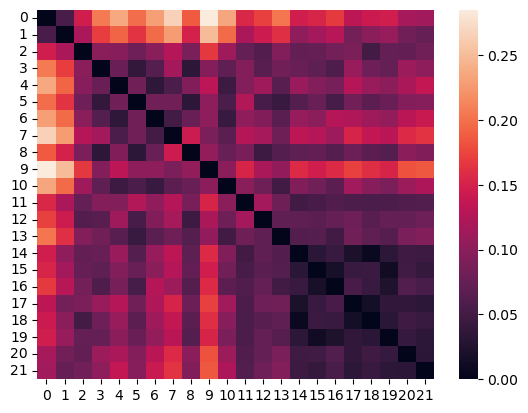

In [14]:
sns_fig = sns.heatmap(sims_dmd)
sns_fig.figure.savefig('../figures/pythia-2.8b_across_training_sims_dmd_heatmap.png')

/home/jsalle/.conda/envs/p11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jsalle/.conda/envs/p11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jsalle/.conda/envs/p11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jsalle/.conda/envs/p11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstan

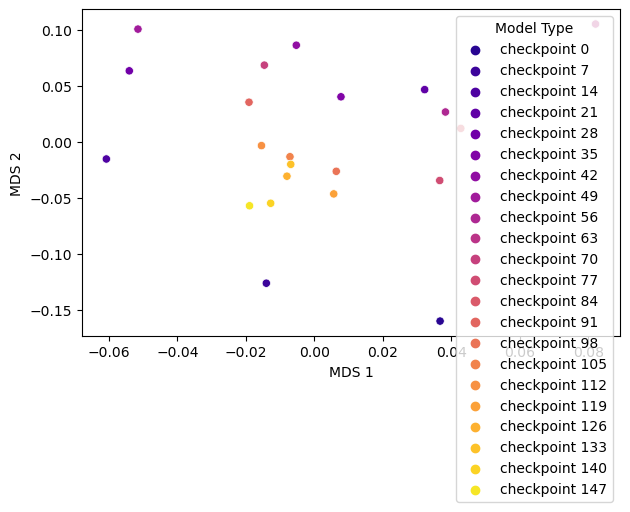

In [13]:
import matplotlib.pyplot as plt

df = pd.DataFrame()
df['Model Type'] = model_types
lowd_embedding = MDS(dissimilarity='precomputed').fit_transform(sims_dmd)
df[f"DMD:0"] = lowd_embedding[:,0] 
df[f"DMD:1"] = lowd_embedding[:,1]
    

fig,ax = plt.subplots(1,1,sharex=True,sharey=True)
palette = 'plasma'
sns.scatterplot(data=df,x=f"DMD:0",y=f"DMD:1",hue="Model Type",ax=ax,palette=palette)
ax.set_xlabel(f"MDS 1")
ax.set_ylabel(f"MDS 2")
plt.tight_layout()

plt.savefig('../figures/pythia-2.8b_across_training_mds.png')